In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy import interp
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# misc toolkit
import warnings
warnings.filterwarnings('ignore')
import itertools


# ml toolkit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# natural language toolkit
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import nltk
nltk.download('wordnet')
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import VarianceThreshold

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yxg0rzh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1]:
def save_model(model, model_name):
    """
    Saves model object
    
    param model:
        fitted model
        
    :type model: ``object`` 
    
    param model_name:
        model name and path to be saved
        
    :type model: ``string``     
    """
    retur
    %timeit dill.dump(model, open(model_name,'wb'))
    return 

def get_model(path):
    """
    Grabs serialized object
    
    param path:
        path and name of model
        
    :type path: ``string``
    """
    return dill.load(open(path,'rb'))

In [3]:

# query bq using pandas
def bq_table_to_df(sql, project='analytics-assrt-planning-thd'):
    return pd.read_gbq(sql, project_id=project, dialect = 'standard', verbose=False)

def lem_stem(text):
    return stemmer.stem(lm.lemmatize(text, pos='v'))

# for every word in our document lemmatize & stem, remove stop words
def tokenize_lemmatize(text):
    return [lem_stem(token) for token in gensim.utils.simple_preprocess(text) if token not in gensim.parsing.preprocessing.STOPWORDS]

In [4]:

sql="""
SELECT *
FROM `analytics-supplychain-thd.akaboshi_test.SMRT_HM_TRAIN`
"""
df_train = pd.read_gbq(sql, project_id= 'analytics-supplychain-thd', dialect = 'standard', verbose=False)

In [5]:
sql="""
SELECT *
FROM `analytics-supplychain-thd.akaboshi_test.SMRT_HM_INPUT`
"""

df_input = pd.read_gbq(sql, project_id='analytics-supplychain-thd', dialect = 'standard', verbose=False)

In [365]:
df_train.head()

,SKU_NBR,SKU_CRT_DT,SKU_KEY,ATTR_VAL_LIST,SMART_HM_C
0,843051,1995-03-27,84305119950327,"2 YEAR LIMITED, R42-01463-GLW, 3-WAY LIGHTED ...",0
1,843034,1995-03-27,84303419950327,"R42-01461-GLW, WHITE FINISH, CLEAR, 1-POLE RE...",0
2,585722,2002-12-11,58572220021211,"8211-106, WALL-MOUNT OUTDOOR LANTERN-DISCONTI...",0
3,585736,2002-12-11,58573620021211,THE CORDELIA LIGHTING WALL-MOUNT OUTDOOR LANT...,0
4,487141,2002-12-11,48714120021211,"194 GPM RECOVERY RATE AT A 100 F RISE, THE PE...",0


In [376]:
df_input.head()

,SKU_NBR,SKU_CRT_DT,SMART_HM_VNDR,SMART_HM_CERT,ATTR_VAL_LIST
0,1001794988,2016-04-05,1,0,"SAMSUNG, ENERGY STAR QUALIFIED, EXCEEDING FED..."
1,1001794829,2016-04-05,1,0,28 CU. FT. TOTAL CAPACITY IS ENOUGH TO STORE ...
2,1004663014,2019-10-07,1,0,"GN-EW004-999, ONE YEAR LIMITED WARRANTY, WI-F..."
3,1005475694,2020-06-19,1,0,ROPE SENSOR DRIES INSTANTLY: WIPE WITH A CLOT...
4,1004831265,2019-10-08,1,0,"GLOBE ELECTRIC, SPECIFICATIONS: SYSTEM REQUIR..."


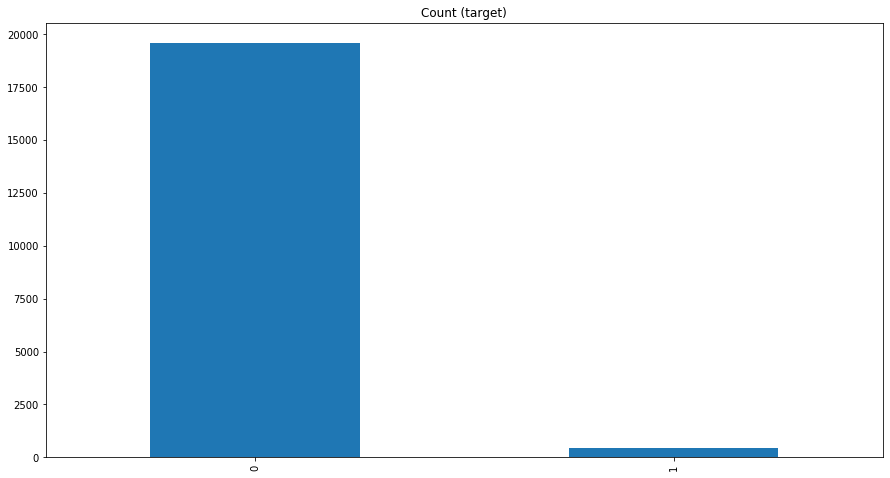

In [389]:
df_train.SMART_HM_C.value_counts()
df_train.SMART_HM_C.value_counts().plot(kind='bar', title='Count (target)')
df_train = df_train.dropna()

## Text Cleaning (Normal Way)

In [390]:
##data = df_train[["ATTR_VAL_LIST","SMART_HM_C"]].reset_index(drop = True)
X = df_train["ATTR_VAL_LIST"]
y= df_train["SMART_HM_C"]


In [391]:
SEED = 101
X_train, X_test, y_train, y_test = train_test_split(
        X
      , y
      , test_size=0.2
      , random_state=SEED
      , shuffle=True)

In [371]:
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')
def lem_stem(x):
    x1=lemmatizer.lemmatize(x, pos='v')
    x2 =stemmer.stem(x1)
    return x2
def toWords(text):
    return [lem_stem(a) for a in gensim.utils.simple_preprocess(text) if a not in STOPWORDS]
# gensim.utils.simple_preprocess include lower(), split(),re.sub("[^a-zA-Z]","",text)
# First use gensim.utils.simple_preprocess to split the text and then use lem_stem to lemmatize and stem each string in list

In [397]:
toWords(X_train.iloc[0])[:10]

['voltag',
 'hz',
 'easi',
 'instal',
 'kit',
 'includ',
 'comfort',
 'greatest',
 'eas',
 'window']

it seems that toWords function is right for one row but when I apply to all of the rows in X_train. It doesn't contain " " for each word which makes it hard to tfidf vectorize

eg.

X_train.iloc[0:3].apply(lambda x: toWords(x))

answer:

443      [voltag, hz, easi, instal, kit, includ, comfor... ] 

5212     [rvg, bl, galvan, steel, roof, vent, sq, net, ...

18785    [river, good, lexington, lead, integr, ceil, f...

Name: ATTR_VAL_LIST, dtype: object


In [415]:
len(X_train)

15996

In [425]:
X_changed = []
for i in range(0,15996):
    X_changed.append(" ".join(toWords(X_train.iloc[i])))

## Take three rows in X_changed in TFIDF for example

In [426]:
tfidf=TfidfVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,
encoding='utf-8',lowercase=False, stop_words = None)
vectors_test = tfidf.fit_transform(X_changed[0:3])
## TFIDF accespts a list of strings ["eat sleep drink","wowo sleep drink"]

In [427]:
feature_names= tfidf.get_feature_names()

In [428]:
dense = vectors_test.todense()
denselist = dense.tolist()
pd.DataFrame(denselist, columns=feature_names)

,add,air,allow,aluminum,ambianc,area,arriv,auto,automat,balanc,...,voltag,washabl,wast,watt,way,weatherproof,white,wind,window,year
0,0.000000,0.351645,0.070329,0.000000,0.000000,0.035165,0.046237,0.092474,0.092474,0.000000,...,0.046237,0.046237,0.046237,0.000000,0.184948,0.000000,0.035165,0.046237,0.138711,0.035165
1,0.070833,0.000000,0.000000,0.093137,0.000000,0.141667,0.000000,0.000000,0.000000,0.093137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.093137,0.000000,0.000000,0.000000,0.000000
2,0.051436,0.102871,0.102871,0.000000,0.067632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.067632,0.000000,0.000000,0.051436,0.000000,0.000000,0.154307


In [429]:
tfidf=TfidfVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,
encoding='utf-8',lowercase=False, stop_words = None)
vectors = tfidf.fit_transform(X_changed)
# fit the model on all the rows

## Machine Learning part -Classification with vectors (normal way)

In [430]:
mExtraTreesClassifier = ExtraTreesClassifier(
         random_state=SEED
        ,n_estimators=100
        ,n_jobs=-1)


In [431]:
# score model on kfolds of out of sample data with instantiate unfitted model passed thru
cv_scores = cross_val_score(mExtraTreesClassifier
           ,X = vectors
           ,y = y_train
           ,cv = 10
           ,scoring='f1' 
           ,n_jobs = -1)
# refit model on training dataset to evaualate model further
##ml_pipeline.fit(X_train, y_train)

In [38]:
# get mean absolute error cv scores
cv_mae = round(abs(np.mean(cv_scores)),2)
print('cv score: {mae}'.format(mae=cv_mae))

cv score: 0.62


##  Make a Pipline to do nlp_processing , TFIDF and machine learning 

In [432]:
class NLPPreprocessing():
    """
        Because Sci-Kit Learn does not contain the certain token preprocessing steps
        We must do the following to include these preprocessing steps into our pipeline
    """
    def __init__(self):
        # instantiate objects 
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = SnowballStemmer('english')
        self.stopwords = gensim.parsing.preprocessing.STOPWORDS

    def lem_stem(self, text):
        return self.stemmer.stem(self.lemmatizer.lemmatize(text, pos='v'))
    
    # nothing to fit on this class
    def fit(self, X, y=None):
        return self
    
    # for every word in our document lemmatize & stem, remove stop words
    def transform(self, X):
         return [gensim.utils.simple_preprocess(self.lem_stem(token)) for token in X if token not in self.stopwords]

def identity(arg):
    """
    Simple identity function works as a passthrough.
    
    Note that when using the TfidfVectorizer you must 
    make sure that its default preprocessor, normalizer, and tokenizer 
    are all turned off using the identity function and passing None to the other parameters.
    """
    return arg

In [270]:
NLP =NLPPreprocessing()

In [271]:
NLP.fit(X_train[0])

In [272]:
NLP.transform(X_train[0:3])

[['voltage',
  'hz',
  'easy',
  'installation',
  'kit',
  'included',
  'get',
  'comfortable',
  'with',
  'the',
  'greatest',
  'of',
  'ease',
  'this',
  'window',
  'unit',
  'comes',
  'with',
  'our',
  'easy',
  'to',
  'use',
  'installation',
  'kit',
  'so',
  'you',
  'can',
  'set',
  'up',
  'your',
  'air',
  'conditioner',
  'with',
  'ease',
  'to',
  'purchase',
  'this',
  'item',
  'in',
  'your',
  'local',
  'store',
  'search',
  'item',
  'filter',
  'light',
  'reminder',
  'btu',
  'window',
  'air',
  'conditioner',
  'washable',
  'and',
  'reusable',
  'air',
  'filter',
  'saves',
  'money',
  'on',
  'replacements',
  'lg',
  'electronics',
  'removes',
  'up',
  'to',
  'pt',
  'of',
  'moisture',
  'from',
  'the',
  'air',
  'in',
  'hour',
  'to',
  'control',
  'humidity',
  'lw',
  'estimated',
  'cooling',
  'area',
  'sq',
  'ft',
  'for',
  'temperature',
  'control',
  'lw',
  'white',
  'hour',
  'on',
  'off',
  'timer',
  'lets',
  'you',


In [299]:
nlp_pp_pipe = Pipeline(
        steps=[
             ('nlp_pp', NLPPreprocessing())
            ,('tfv', TfidfVectorizer(tokenizer=identity
                                    ,preprocessor=None
                                    ,encoding='utf-8'
                                    ,lowercase=False))
        ]       
)

In [436]:
ml_pipeline = make_pipeline(
            nlp_pp_pipe
           ,mExtraTreesClassifier
)

In [437]:
size_X_train = len(X_train) 
size_X_test = len(X_test)

print('{} Size of the Training dataframe'.format(size_X_train))
print('{} Size of the Testing dataframe'.format(size_X_test))

15996 Size of the Training dataframe
3999 Size of the Testing dataframe


In [438]:
cv_scores = cross_val_score(ml_pipeline 
           ,X = X_train
           ,y = y_train
           ,cv = 10
           ,scoring='f1' 
           ,n_jobs = -1)

In [439]:
cv_scores

array([0.54901961, 0.58181818, 0.67857143, 0.64285714, 0.66666667,
       0.57692308, 0.64150943, 0.55555556, 0.70175439, 0.69090909])

In [444]:
# get mean absolute error cv scores
cv_mae = round(abs(np.mean(cv_scores)),2)
print('cv score: {mae}'.format(mae=cv_mae))

cv score: 0.63


In [441]:
# based on the model with the best chosen hyperparameters
# get the prediction based on our holdout dataset
ml_pipeline.fit(X_train, y_train)
predictions = ml_pipeline.predict(X_test)

# Accuracy Score *Ignore* because of imbalanced classes
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100.0))

# Precision Score
print('Precision: %.2f%%' % (precision_score(y_test, predictions) * 100.0))

# Recall Score
print('Recall: %.2f%%' % (recall_score(y_test, predictions) * 100.0))

# Precision and Recall are weighted equally
print('F1 : %.2f%%' % (fbeta_score(y_test, predictions, 1) * 100.0))

# Recall weighted 2X Precision
print('F2 : %.2f%%' % (fbeta_score(y_test, predictions, 2) * 100.0))

Accuracy: 99.00%
Precision: 90.38%
Recall: 57.32%
F1 : 70.15%
F2 : 61.84%


Text(0, 0.5, '%')

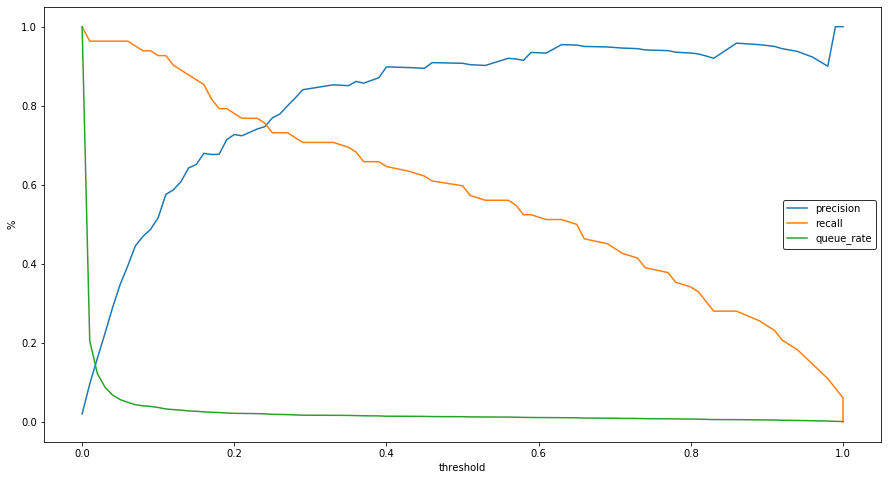

In [442]:
proba=ml_pipeline.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, proba)
thresholds = np.append(thresholds, 1) 
queue_rate = [] 

for threshold in thresholds: 
    queue_rate.append((proba >= threshold).mean()) 
    
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 

leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')

In [443]:
# lets see predictions 
# we can X_test directly in ml.pipeline for predicting
predictions = ml_pipeline.predict(X_test.head(5))
for i, prediction in enumerate(predictions):
    print('\n')
    print('Prediction: {}. Actual {}. Message: {}'.format(prediction, y_test.iloc[i], X_test.iloc[i]))



Prediction: 0. Actual 0. Message:  WOOD BLADES, WAREHOUSE OF TIFFANY, BULB TYPE:(3)60-WATT E12 LIGHT BULBS (INCLUDED), ASSEMBLY REQUIRED, INSTRUCTION ASSEMBLY MANUAL INCLUDED, SUBCATEGORY: REMOTE CONTROLLED CEILING FAN, WAREHOUSE OF TIFFANY, 15 DAYS, THIS EXQUISITE PIECE MODELS OLD WORLD DESIGNS INTO A MODERN EFFICIENT CEILING FAN. BEAUTIFULLY MOLDED BRANCH PATTERNED METAL COMBINED WITH A TRADITIONAL FRENCH LAMP WILL GIVE YOU THE LUXURY YOU SEEK. HIGH QUALITY ULTRA CLEAR CRYATAL PENDANTS EMBELLISH THROUGHOUT., MULTI-DIRECTIONAL, BLADE SIZE: 20.50 IN. L 5.43 IN. W, 2 DOWNRODS INCLUDED, NUMBER OF BULBS: THREE (3), FIRTHA 52 IN. INDOOR BRONZE FINISH REMOTE CONTROLLED CEILING FAN WITH LIGHT KIT, FAN BLADE COLOR: WHITE MAPLE AND SILVER, REVERSIBLE BLADE FACES AND REVERSIBLE MOTOR, MATERIAL VALUE: METALFABRICWOOD, 3 SPEED, CFL-8211REMO/AB, CFL-8211REMO/AB, 5 BLADES, HARDWIRED


Prediction: 0. Actual 0. Message:  MATTE-WHITE ACRYLIC DIFFUSER, 146F56, MOUNTS FLUSH TO CEILING OR WALL, USES ON

## test a word

In [449]:
print(mExtraTreesClassifier.classes_)
ml_pipeline.predict_proba(['nest thermostat smart google google google'])

[0 1]


array([[0.74, 0.26]])

In [ ]:
# save model
save_model(ml_pipeline, 'smart_hm_model.pkl')

In [455]:
X_changed[1]

'rvg bl galvan steel roof vent sq net free area black gibraltar build product reliabl gaug galvan steel balanc ventil prolong life roof provid energi save comfort sq roof vent reliabl gaug galvan steel larg base offer add weatherproof protect eas instal vent featur th inch intern aluminum screen prevent intrus bird larg insect sq net free area rvg bl roof pitch gibraltar build product effici low profil design remov hood'

In [ ]:
ml_pipeline = get_model('smart_hm_model.pkl')

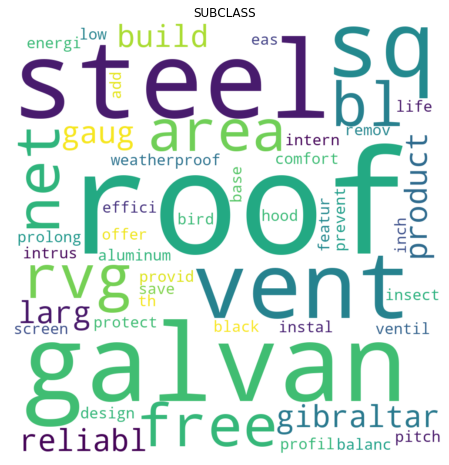

In [456]:
stopwords = set(gensim.parsing.preprocessing.STOPWORDS)

    # Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords , background_color="white"
                        , random_state=101
                        , relative_scaling=1
                        , margin=4
                        , min_font_size = 8
                        , max_words=200
                        , width=1000
                        , height=1000
                        , scale=1
                         ).generate(X_changed[1])
    
                      
    # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('SUBCLASS')
plt.axis("off")
plt.show()
    
#     keepcharacters = (' ','.','_')
#     filename = "".join(c for c in sub_class if c.isalnum() or c in keepcharacters).rstrip()
#     wordcloud.to_file(r'C:\Users\axf0409\Downloads\{}.png'.format(filename))